In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Sequential

In [3]:
x_train = np.load(r'/content/gdrive/My Drive/Global AI Hub/Dataset/x_train.npy')
y_train = np.load(r'/content/gdrive/My Drive/Global AI Hub/Dataset/y_train.npy')
x_val = np.load(r'/content/gdrive/My Drive/Global AI Hub/Dataset/x_val.npy')
y_val = np.load(r'/content/gdrive/My Drive/Global AI Hub/Dataset/y_val.npy')
x_test = np.load(r'/content/gdrive/My Drive/Global AI Hub/Dataset/x_test.npy')
y_test = np.load(r'/content/gdrive/My Drive/Global AI Hub/Dataset/y_test.npy')

In [ ]:
len(x_train)

In [12]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [35]:
lr = 0.01
def learning_rate(epoch):
    global lr
    if epoch>8:
        return lr*.1
    else:
        return lr

In [36]:
results = model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
219/219 [==============================] - 1s 7ms/step - loss: 0.1211 - accuracy: 0.9631 - val_loss: 0.9477 - val_accuracy: 0.8396 - lr: 0.0100
Epoch 2/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1295 - accuracy: 0.9612 - val_loss: 0.9646 - val_accuracy: 0.8202 - lr: 0.0100
Epoch 3/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1160 - accuracy: 0.9658 - val_loss: 0.6708 - val_accuracy: 0.8740 - lr: 0.0100
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 0.0999 - accuracy: 0.9724 - val_loss: 1.2390 - val_accuracy: 0.7869 - lr: 0.0100
Epoch 5/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1201 - accuracy: 0.9632 - val_loss: 0.8912 - val_accuracy: 0.8362 - lr: 0.0100
Epoch 6/50
219/219 [==============================] - 1s 6ms/step - loss: 0.0793 - accuracy: 0.9755 - val_loss: 0.8994 - val_accuracy: 0.8316 - lr: 0.0100
Epoch 7/50
219/219 [==============================] - 1s 6ms/step - lo

In [37]:
test_result = model.test_on_batch(x_test,y_test)
test_result

[0.6954033970832825, 0.8878718614578247]

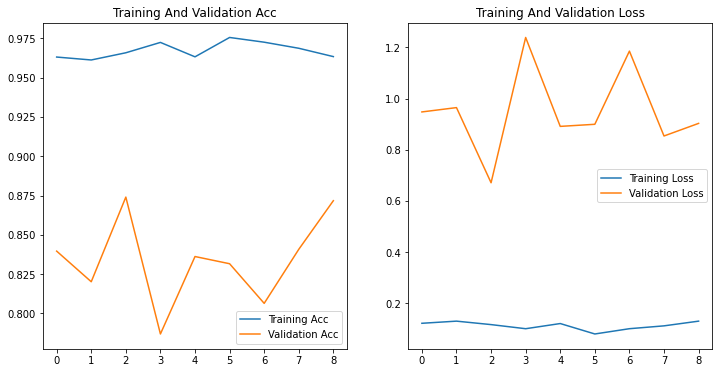

In [39]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

In [40]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [41]:
lr = 0.01
def learning_rate(epoch):
    global lr
    if epoch>8:
        return lr*.1
    else:
        return lr

In [42]:
results = model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
219/219 [==============================] - 2s 7ms/step - loss: 1.1459 - accuracy: 0.6089 - val_loss: 3.4847 - val_accuracy: 0.1420
Epoch 2/50
219/219 [==============================] - 1s 6ms/step - loss: 0.6325 - accuracy: 0.7906 - val_loss: 1.6232 - val_accuracy: 0.4777
Epoch 3/50
219/219 [==============================] - 1s 6ms/step - loss: 0.4290 - accuracy: 0.8534 - val_loss: 0.6801 - val_accuracy: 0.7835
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 0.3086 - accuracy: 0.8969 - val_loss: 0.5664 - val_accuracy: 0.8373
Epoch 5/50
219/219 [==============================] - 1s 6ms/step - loss: 0.2192 - accuracy: 0.9298 - val_loss: 0.5371 - val_accuracy: 0.8362
Epoch 6/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1460 - accuracy: 0.9555 - val_loss: 0.4829 - val_accuracy: 0.8545
Epoch 7/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1372 - accuracy: 0.9549 - val_loss: 0.4938 - val_accuracy: 0.8534
Epoch 

In [43]:
test_result = model.test_on_batch(x_test,y_test)
test_result

[0.7815878391265869, 0.8615560531616211]

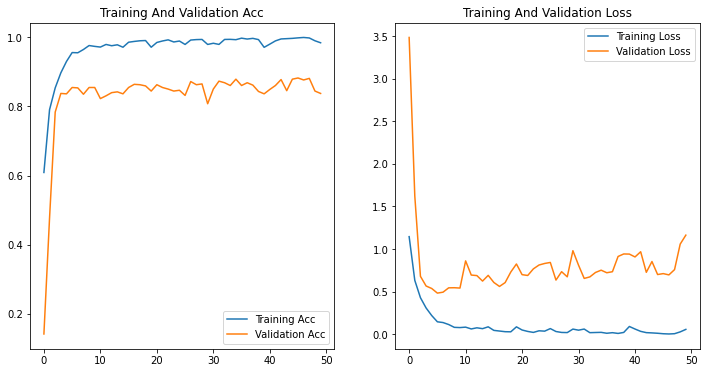

In [44]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()